<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/HOUSEPRICEPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

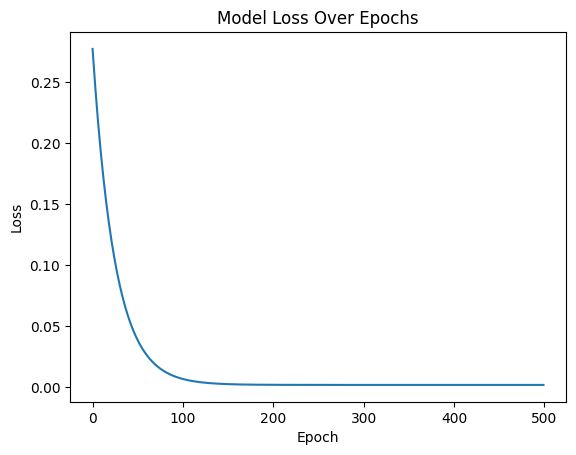

1/1 [==============================] - 0s 94ms/step
Predicted price for a house of size 1250.0 sqft is: $769588.56
Predicted price for a house of size 1750.0 sqft is: $1055110.75
Predicted price for a house of size 2250.0 sqft is: $1340633.00


In [1]:
#QUESTION NO3
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate some dummy data for house sizes (in square feet) and corresponding prices
house_sizes = np.array([850, 900, 1200, 1500, 1800, 2000, 2300], dtype=float)
house_prices = np.array([550000, 585000, 720000, 900000, 1080000, 1200000, 1380000], dtype=float)

# Normalize the data
house_sizes_norm = (house_sizes - house_sizes.mean()) / house_sizes.std()
house_prices_norm = (house_prices - house_prices.mean()) / house_prices.std()

# Define a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model with mean squared error loss function and an optimizer
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model with the normalized data
history = model.fit(house_sizes_norm, house_prices_norm, epochs=500, verbose=0)

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Predict house prices for a few sample house sizes
sample_house_sizes = np.array([1250, 1750, 2250], dtype=float)
sample_house_sizes_norm = (sample_house_sizes - house_sizes.mean()) / house_sizes.std()
predicted_prices_norm = model.predict(sample_house_sizes_norm)

# Convert normalized predicted prices back to actual price scale
predicted_prices = predicted_prices_norm * house_prices.std() + house_prices.mean()

# Print the predicted prices
for size, price in zip(sample_house_sizes, predicted_prices):
    print(f"Predicted price for a house of size {size} sqft is: ${price[0]:.2f}")
